# MIS: CLase Complementaria 11

La clase de hoy se centrará en ver una implementación de Girvan-Newman y posterior a ello, ustedes deberán optimizarla.

In [1]:
import networkx as nx
import numpy as np

In [2]:
# Red 1
#G = nx.erdos_renyi_graph(10,0.5) # Grafo tipo Erdos-Renyi
#G = G.to_directed()
# Red 2
G = nx.DiGraph()
G.add_edges_from([(0,1),(0,2),(0,3),(1,2),(2,3),(1,4),(1,5),(0,5),(3,6),(3,7),(4,8),(4,9),(5,9),(5,10),(6,10),(7,10),(8,11),(9,11),(10,11)])

In [3]:
# Se asignan los atributos a la red deseada.
nx.set_node_attributes(G,{i:False for i in G.nodes},'Asignado')


In [27]:
#G.has_successor
#G.has_predecessor
#G.has_node
#G.has_edge

In [19]:
# Función que construye el árbol.
def Girvan_Newman_Step11(G,tree,root):
    Remain = set(list(G.nodes()))
    n = len(list(Remain))
    conjunto = {root}
    tree.add_node(root)
    #Remain = Remain.difference(conjunto)
    Remain = Remain-conjunto
    Nivel = [conjunto]
    for paso in range(n):
        print(paso)
        if Remain == set():
            break
        else:
            if paso == 0:
                Nivel1 = set(list(G.successors(root)))
                print('Nivel 1',Nivel1)
                for nodo in Nivel1:
                    tree.add_edge(root,nodo)
                Nivel.append(Nivel1)
                Remain = Remain-Nivel1
                #Remain = Remain.difference(Nivel1)
            else:
                Niv_Sig = set()
                print('Nivel {}'.format(paso),Nivel[paso])
                for nodo in list(Nivel[paso]):
                    print(Remain)
                    U = (set(list(G.successors))) & Remain
                    #U = (set(list(G.successors))).intersection(Remain)
                    for i in list(U):
                        tree.add_edge(nodo,i)
                        Niv_Sig = Niv_Sig.union(U)
                Nivel.append(Niv_Sig)
                Remain = Remain-Niv_Sig
                #Remain = Remain.difference(Niv_Sig)

In [20]:
# Función que construye el árbol.
def Girvan_Newman_Step1(G,tree,root,atribute = 'Asignado',begin = True,end = False):
    '''
    -----------------------------------------------
    inputs:
        G (nx.DiGraph): El gráfo inicial que se quiere modificar. Este debe contener nodos y un atributo de nodos que 
        permita identificar si un nodo ya fue o no asignado al árbol.
        tree (nx.DiGraph): Un grafo dirigido que tiene forma de árbol. Valen grafos vacíos.
        root (int): Nodo distinguido que será la raíz del árbol tree
        atribute (str): Nombre del atributo que permite identificar si los nodos de G ya han sido asignados.
        begin (bool): Dice si se está en el nodo raíz del árbol a armar.
        end (bool): Dice si se está en la última rama que se puede armar.

    -----------------------------------------------
    outputs:
        tree (nx.DiGraph): El árbol deseado.
    '''
    if begin:
        G.nodes[root][atribute] = True
    sucesores = [i for i in G.successors(root) if G.nodes[i][atribute]==False]
    if len(sucesores) != 0:
        ultimo = sucesores[len(sucesores)-1] # Señalo el último sucesor
        for i in sucesores: # Cambio el estado de los sucesores a asignados
            tree.add_edge(root,i)
            G.nodes[i][atribute] = True                
        for i in sucesores: 
            predecesores = list(G.predecessors(i))
            if i != ultimo: # Si el sucesor no es el último, solo se modifica el árbol.
                Girvan_Newman_Step1(G = G,tree = tree,root = i,atribute = atribute,begin = False,end = False)
            else: # Si el sucesor es el último, se modifica el árbol. Si es el nodo hoja de la última rama, se retorna el arbol.
                Girvan_Newman_Step1(G = G,tree = tree,root = i,atribute = atribute,begin = False,end = True)
    else:
        if begin: # Esto permite retornar un arbol cuando la raiz es aislada
            tree.add_node(root)
            return tree
        elif end:
            return tree    

In [21]:
# Función que encuentra el número de caminos más cortos de una raiz dada a cada nodo del árbol.
def Girvan_Newman_Step2(tree,root,atribute1 = 'root',atribute2 = 'n_caminos',begin = True):
    '''
    -----------------------------------------------
    inputs:
        tree (nx.DiGraph): Un grafo dirigido que tiene forma de árbol. No valen grafos vacíos.
        root (int): Nodo distinguido que será la raíz del árbol tree
        atribute1 (str): Nombre del atributo de nodo que permite identificar si es raiz o no.
        atribute2 (str): Nombre del atributo de nodo que permite decir cuantos caminos más 
        cortos hay del mismo a la raíz.
        begin (bool): Dice si se está en el nodo raíz del árbol a armar.

    -----------------------------------------------
    outputs:
        No hay.
    '''
    if begin:
        if tree.nodes[root][atribute1] != True:
            raise Exception('Ponga una raíz del árbol')
        else:
            tree.nodes[root][atribute2] = 1
            #print('Nodo({})->{}'.format(root,tree.nodes[root][atribute2]))
    #print('Nodo a evaluar: {}'.format(root))
    sucesores = list(tree.successors(root))
    if len(sucesores) != 0:
        for node in sucesores:
            if tree.nodes[node][atribute2] == -1:
                predecesores = list(tree.predecessors(node))
                prueba = [tree.nodes[node_pred][atribute2]!=-1 for node_pred in predecesores]
                #print(prueba)
                if all(prueba):
                    valores_previos = [tree.nodes[node_pred][atribute2] for node_pred in predecesores]
                    #print(valores_previos)
                    tree.nodes[node][atribute2] = sum(valores_previos)
                    #print('Nodo({})->{}'.format(node,tree.nodes[node][atribute2]))
        for node in sucesores:
            Girvan_Newman_Step2(tree,node,atribute1,atribute2,False)

In [22]:
def Girvan_Newman_Step3(tree,root,atribute1 = 'root',atribute2 = 'pesos',atribute3 = 'e_pesos',begin = True):
    '''
    -----------------------------------------------
    inputs:
        tree (nx.DiGraph): Un grafo dirigido que tiene forma de árbol. No valen grafos vacíos.
        root (int): Nodo distinguido que será la raíz del árbol tree
        atribute1 (str): Nombre del atributo de nodo que permite identificar si es raiz o no.
        atribute2 (str): Nombre del atributo de nodo que permite decir cuál es el peso del nodo.
        atribute3 (str): Nombre del atributo de nodo que permite decir cuál es el peso que el 
        nodo puede heredar a sus predecesores.
        begin (bool): Dice si se está en el nodo raíz del árbol a armar.

    -----------------------------------------------
    outputs:
        No hay.
    '''
    if begin:
        if tree.nodes[root][atribute1] != True:
            raise Exception('Ponga una raíz del árbol')
        hojas = [leaf for leaf in tree.nodes() if []==list(tree.successors(leaf))]
        for hoja in hojas:
            tree.nodes[hoja][atribute2] = 1
            tree.nodes[hoja][atribute3] = 1/(len(list(tree.predecessors(hoja))))
        for hoja in hojas:
            Girvan_Newman_Step3(tree,hoja,atribute1,atribute2,atribute3,False)
    else:
        sucesores = list(tree.successors(root))
        prueba = [tree.nodes[node_succ][atribute2]!=-1 for node_succ in sucesores]
        if all(prueba):
            tree.nodes[root][atribute2] = sum([tree.nodes[node_succ][atribute3] for node_succ in sucesores])+1
            predecesores = list(tree.predecessors(root))
            if len(predecesores)!=0:
                tree.nodes[root][atribute3] = (tree.nodes[root][atribute2])/(len(predecesores))
                for node in predecesores:
                    Girvan_Newman_Step3(tree,node,atribute1,atribute2,atribute3,False)
            else:
                tree.nodes[root][atribute3] = tree.nodes[root][atribute2]



    
    

In [23]:
tree = nx.DiGraph()
GG = G.copy()
Girvan_Newman_Step11(GG,tree,0)
#Girvan_Newman_Step1(GG,tree,0,atribute = 'Asignado')
nx.draw(tree)

0
Nivel 1 {1, 2, 3, 5}
1
Nivel 1 {1, 2, 3, 5}
{4, 6, 7, 8, 9, 10, 11}


TypeError: 'method' object is not iterable

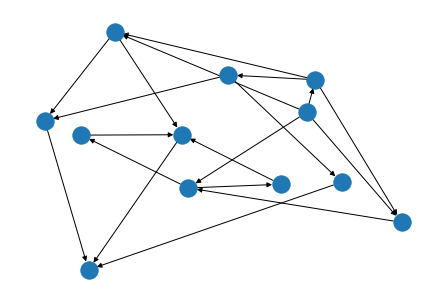

In [9]:
nx.draw(G)

In [10]:
# Ejemplo con árbol ya construido (puede saltarlo si quiere)
#tree = nx.DiGraph()
#tree.add_edges_from([(0,1),(0,2),(0,3),(1,4),(1,5),(3,6),(3,7),(4,8),(4,9),(5,9),(5,10),(6,10),(7,10),(8,11),(9,11),(10,11)])
#nx.draw(tree)


In [11]:
# Establecimiento de los parámetros para el paso 2: raiz y número de caminos
nx.set_node_attributes(tree,{i:False for i in tree.nodes},'root')
tree.nodes[0]['root'] = True
nx.set_node_attributes(tree,{i:-1 for i in tree.nodes},'n_caminos')

In [12]:
# Correr el paso 2 y revisar el número de caminos más cortos de la raíz a los demás nodos
Girvan_Newman_Step2(tree,0)
nx.get_node_attributes(tree,'n_caminos')

{0: 1, 1: 1, 2: 1, 3: 1, 5: 1, 4: 1, 8: 1, 9: 1, 11: 1, 6: 1, 7: 1, 10: 1}

In [13]:
# Establecimiento de los parámetros para el paso 3: pesos de los nodos y pesos de los enlaces
nx.set_node_attributes(tree,{i:-1 for i in tree.nodes},'pesos')
nx.set_node_attributes(tree,{i:-1 for i in tree.nodes},'e_pesos')

In [14]:
# Correr el paso 3 y revisar pesos de los nodos y pesos de los enlaces
Girvan_Newman_Step3(tree,0)
nx.get_node_attributes(tree,'pesos')

{0: 12.0,
 1: 5.0,
 2: 1,
 3: 4.0,
 5: 1,
 4: 4.0,
 8: 2.0,
 9: 1,
 11: 1,
 6: 2.0,
 7: 1,
 10: 1}

In [15]:
nx.get_node_attributes(tree,'e_pesos')

{0: 12.0,
 1: 5.0,
 2: 1.0,
 3: 4.0,
 5: 1.0,
 4: 4.0,
 8: 2.0,
 9: 1.0,
 11: 1.0,
 6: 2.0,
 7: 1.0,
 10: 1.0}

In [16]:
# Implementación completa
def Girvan_Newman(graph,root):
    tree = nx.DiGraph()
    G = graph.copy()
    if nx.is_directed(graph) == False:
        G = G.to_directed()      
    nx.set_node_attributes(G,{i:False for i in G.nodes},'Asignado')   
    Girvan_Newman_Step1(G,tree,root,atribute = 'Asignado')

    nx.set_node_attributes(tree,{i:False for i in tree.nodes},'root')
    tree.nodes[root]['root'] = True
    nx.set_node_attributes(tree,{i:-1 for i in tree.nodes},'n_caminos')

    Girvan_Newman_Step2(tree,root)
    print('\nNémero de caminos más cortos: \n')
    print(nx.get_node_attributes(tree,'n_caminos'))

    nx.set_node_attributes(tree,{i:-1 for i in tree.nodes},'pesos')
    nx.set_node_attributes(tree,{i:-1 for i in tree.nodes},'e_pesos')

    Girvan_Newman_Step3(tree,root)
    print('\nPesos nodos: \n')
    print(nx.get_node_attributes(tree,'pesos'))
    print('\nPesos enlaces: \n')
    print(nx.get_node_attributes(tree,'e_pesos'))

    return tree

In [17]:
arbol = Girvan_Newman(G,0)


Némero de caminos más cortos: 

{0: 1, 1: 1, 2: 1, 3: 1, 5: 1, 4: 1, 8: 1, 9: 1, 11: 1, 6: 1, 7: 1, 10: 1}

Pesos nodos: 

{0: 12.0, 1: 5.0, 2: 1, 3: 4.0, 5: 1, 4: 4.0, 8: 2.0, 9: 1, 11: 1, 6: 2.0, 7: 1, 10: 1}

Pesos enlaces: 

{0: 12.0, 1: 5.0, 2: 1.0, 3: 4.0, 5: 1.0, 4: 4.0, 8: 2.0, 9: 1.0, 11: 1.0, 6: 2.0, 7: 1.0, 10: 1.0}


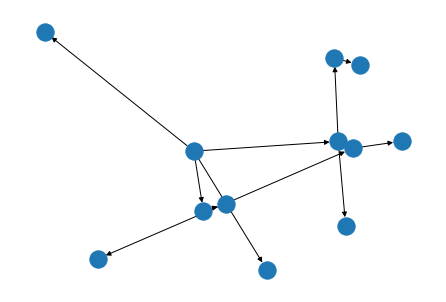

In [18]:
nx.draw(arbol)

¡Pero las implementaciones anteriores son malas!
¿Cómo las mejorarían? Esto depende del entendimiento que ustedes tengan de los algoritmos, de su creatividad y de cómo plantean una solución a este tipo de problemas. Esto también los puede llevar a una implementación muy distinta a la que les muestro en este notebook. Para saber si sus implementaciones son mejores, pueden compararlas con las presentadas en términos de:

    1) Complejidad.
    2) Tiempo de ejecución.
    3) Uso de memoria.